## TRAINED MODEL

In [1]:
import pandas as pd
import datetime as dt

# Cargar el dataset
df = pd.read_excel("../data/online_retail_II.xlsx", sheet_name="Year 2010-2011")

# Eliminar filas con valores nulos en las columnas relevantes
df.dropna(subset=['Customer ID'], inplace=True)

# Filtrar las transacciones canceladas (con 'C' en la columna 'Invoice')
df = df[~df['Invoice'].str.contains('C', na=False)]

# Crear la columna 'TotalPrice' que representa el valor total de cada transacción
df['TotalPrice'] = df['Quantity'] * df['Price']

# Calcular la fecha más reciente en el dataset
today_date = dt.datetime(2011, 12, 11)

# Calcular las métricas RFM agrupando por 'Customer ID'
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
})

# Renombrar las columnas
rfm.columns = ['recency', 'frequency', 'monetary']

# Verificar las primeras filas del DataFrame resultante
rfm.head()


,recency,frequency,monetary
Customer ID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


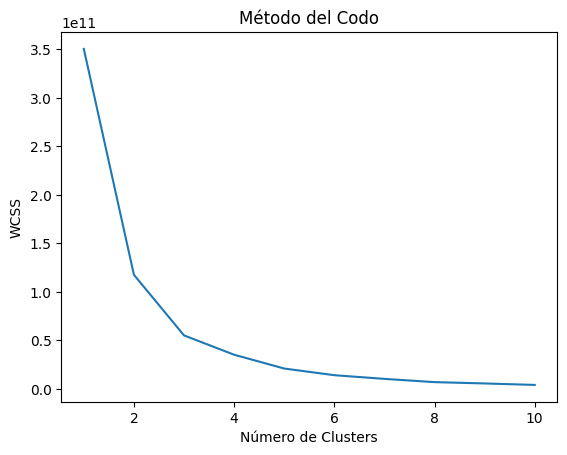

Modelo K-Means entrenado y guardado como 'model.pkl'


In [2]:
from sklearn.cluster import KMeans
import joblib
import matplotlib.pyplot as plt

# Seleccionamos las columnas que utilizaremos para el clustering
X = rfm[['recency', 'frequency', 'monetary']]

# Determinar el número óptimo de clusters (Método del codo)
def calculate_wcss(data):
    wcss = []
    for n in range(1, 11):
        kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

wcss = calculate_wcss(X)

# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Entrenar el modelo K-Means con el número óptimo de clusters (supongamos 4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

# Asignar los clusters al DataFrame original
rfm['Cluster'] = kmeans.labels_

# Guardar el modelo entrenado
# joblib.dump(kmeans, 'model.pkl')

print("Modelo K-Means entrenado y guardado como 'model.pkl'")


In [3]:
# Guardar el DataFrame rfm con las asignaciones de clusters
rfm.to_csv("../data/rfm_with_clusters.csv", index=False)


In [4]:
joblib.dump(kmeans, '../data/model.pkl')

['model.pkl']